# Walkthrough

In [9]:
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

In [10]:
from classes import preprocess, eda, LDA, KMeansClustering, sentiment_analysis, models

# Data preparation (with\out duplicates)


In [11]:
free_tuition = preprocess(df='raw data/Free Tuition.csv',added_stopwords='freetuition_stopwords.csv', 
                                       sent_column=['CONTEXT-BASED'], 
                                       comment_column='Comment', dups=1, drop=['Video Link', 'Comment Image Rate'])

shape of raw dataframe:  (1267, 7)
Sentiment null count:  CONTEXT-BASED    6
dtype: int64
CONTEXT-BASED
neutral          689
positive         385
negative         153
empty             21
postive            8
positve            3
 negative          1
neutrall           1
dtype: int64
shape of mapped dataframe:  (1267, 7)
Sentiment null count:  CONTEXT-BASED    37
dtype: int64
shape of dataframe when null comments were dropped:  (1242, 7)
drop
shape of dataframe:  (942, 7)


In [12]:
free_tuition.df['CONTEXT-BASED'].value_counts()

1.0    456
2.0    323
0.0    152
Name: CONTEXT-BASED, dtype: int64

In [13]:
free_tuition.df['Account'].value_counts()

jqcrypto              445
giucomia              353
janelletee             93
papabiii               23
cryptopareh            14
pozlifewithleo         11
mjaguilar_official      2
nixsramos               1
Name: Account, dtype: int64

In [14]:
free_tuition.df.shape

(942, 7)

In [15]:
free_tuition.df.head()

Comment Comment type  \
0  free tuition nga, pero may grade req's. Pinipi...      neutral   
1                    ngi bat ngayon molang alam haha      neutral   
2  hala now niyo lang po nalaman . free tuition n...      neutral   
3  sana madagdagan for nursing. isa sa mga pinaka...      neutral   
4  Nastop ang UNIFAST now, SYC 2021-2022 up until...      neutral   

   CONTEXT-BASED   Account             Timestamp  \
0            1.0  jqcrypto  July 11, 2023, 21:21   
1            1.0  jqcrypto  July 11, 2023, 21:21   
2            2.0  jqcrypto  July 11, 2023, 21:21   
3            1.0  jqcrypto  July 11, 2023, 21:21   
4            1.0  jqcrypto  July 11, 2023, 21:21   

                                            features  \
0  [free, tuition, grade, reqs, pinipili, makpsok...   
1                           [ngi, bat, molang, alam]   
2  [hala, niyo, nalaman, free, tuition, tapos, bi...   
3  [sana, madagdagan, nursing, pinaka, important,...   
4  [nastop, unifast, syc, 20212022, wala, padin, ...   

                              features_string_format  
0  free tuition grade reqs pinipili makpsok magag...  
1                                ngi bat molang alam  
2  hala niyo nalaman free tuition tapos binibigay...  
3  sana madagdagan nursing pinaka important profe...  
4  nastop unifast syc 20212022 wala padin update ...

# Non Duplicate values (context base)

## Phase 1: Free tuition sentiments of jqcrypto's video

### A. Facts and analysis

In [16]:
df1 = free_tuition.df[free_tuition.df['Account'] == 'jqcrypto']

In [17]:
df1['CONTEXT-BASED'].value_counts() 

1.0    219
2.0    159
0.0     59
Name: CONTEXT-BASED, dtype: int64

In [18]:
eda_jqcrypto = eda(df1, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED',folder='jqcrypto')

In [19]:
# total number of comments
eda_jqcrypto.df['features_string_format'].notnull().sum().sum()

445

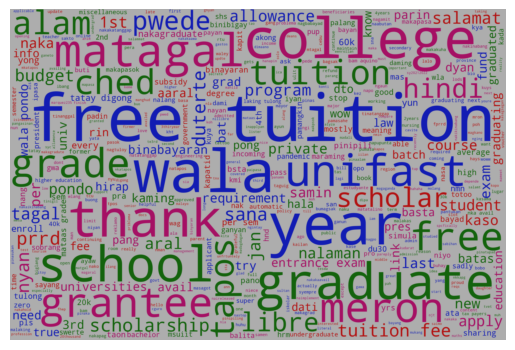

In [20]:
eda_jqcrypto.generate_wordcloud(filename='jqcrypto_all_comment_free_tuition')

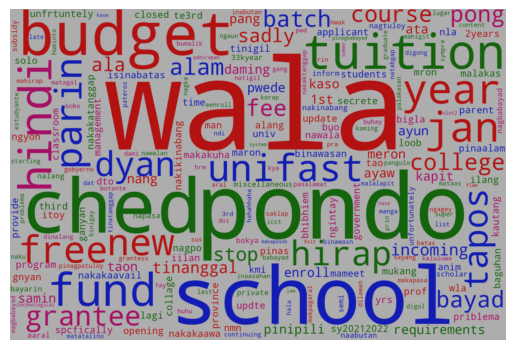

In [21]:
eda_jqcrypto.generate_wordcloud('jqcrypto_negative_free_tution', 'CONTEXT-BASED', 0.0)

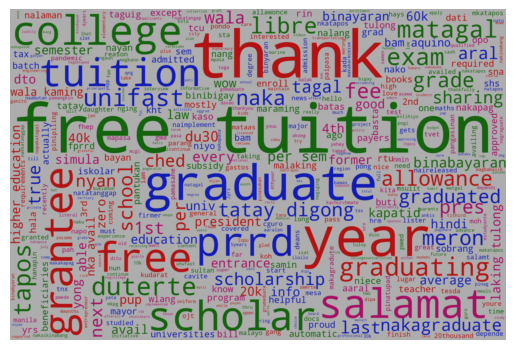

In [22]:
eda_jqcrypto.generate_wordcloud('jqcrypto_positive_free_tution', 'CONTEXT-BASED', 2.0)

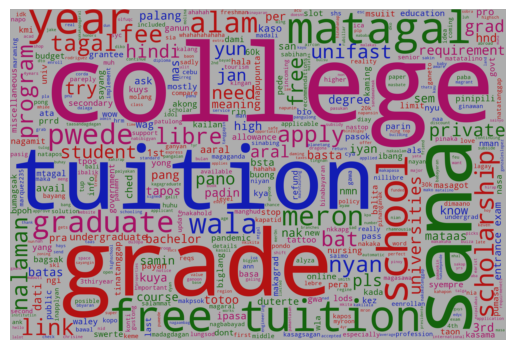

In [23]:
eda_jqcrypto.generate_wordcloud('jqcrypto_neutral_free_tution', 'CONTEXT-BASED', 1.0)

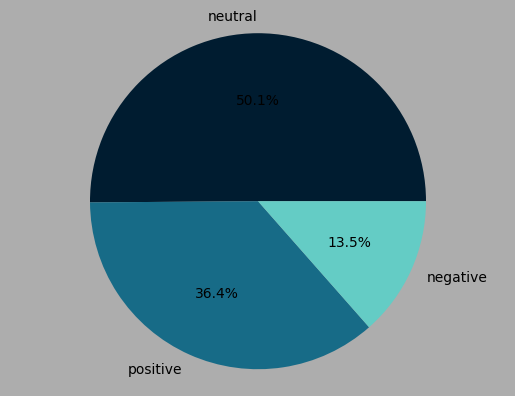

In [24]:
eda_jqcrypto.pie_sentiment('jqcrypto_free_tution', 'CONTEXT-BASED')

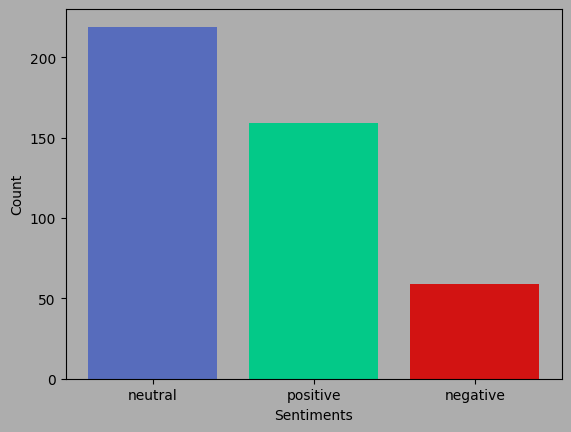

In [25]:
eda_jqcrypto.bar_sentiment('jqcrypto_free_tution', 'CONTEXT-BASED')

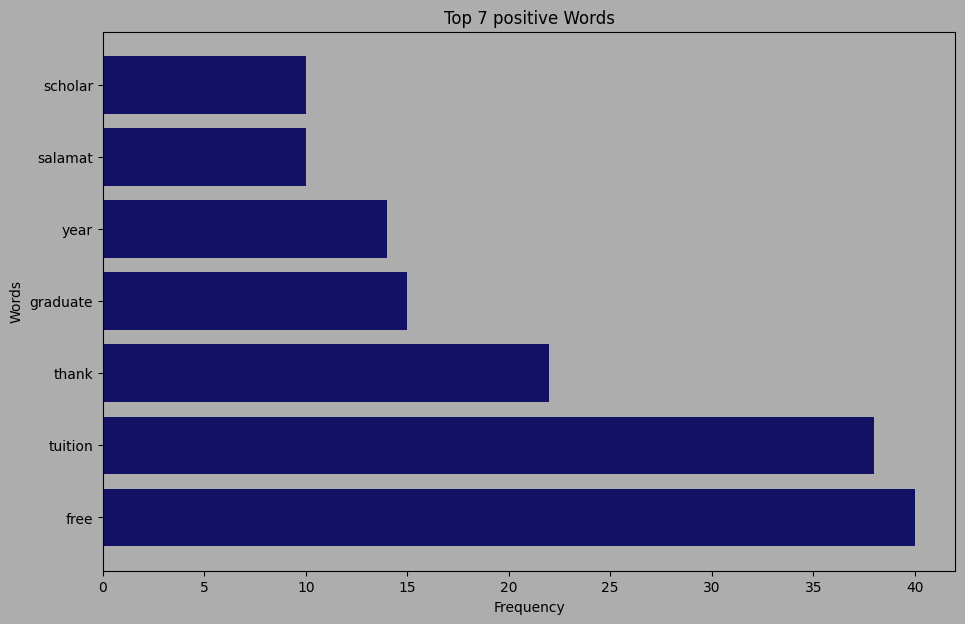

In [26]:
# top 5 positive comments
x = df1[df1['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'jqcrypto_positive_free_tution')

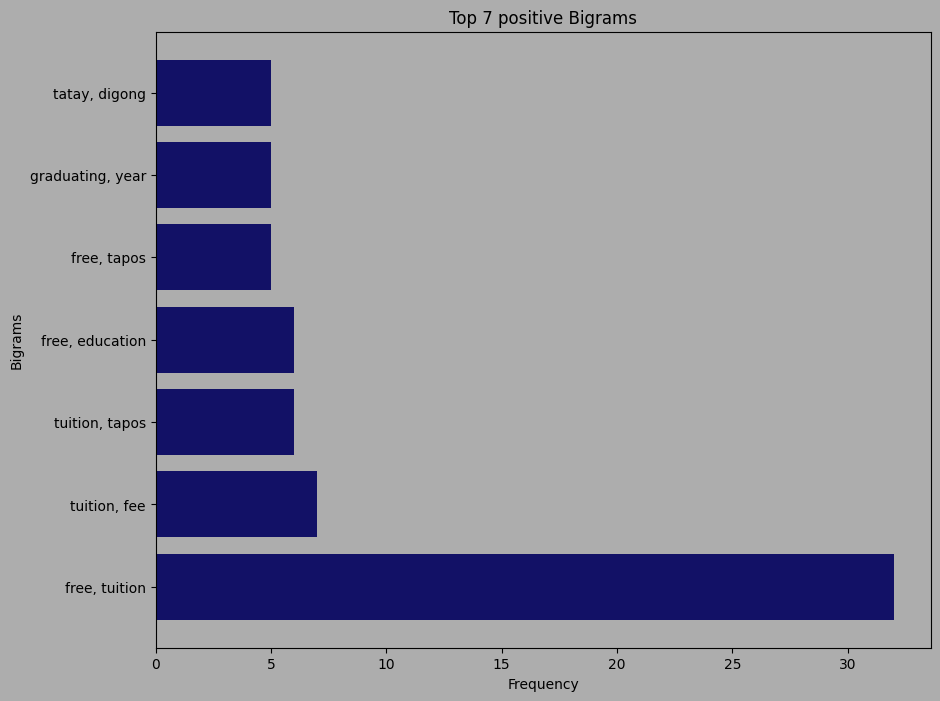

In [27]:
# top 5 positive bigrams
positive.bigrams(7, 'positive', 'jqcrypto_positive_free_tution')

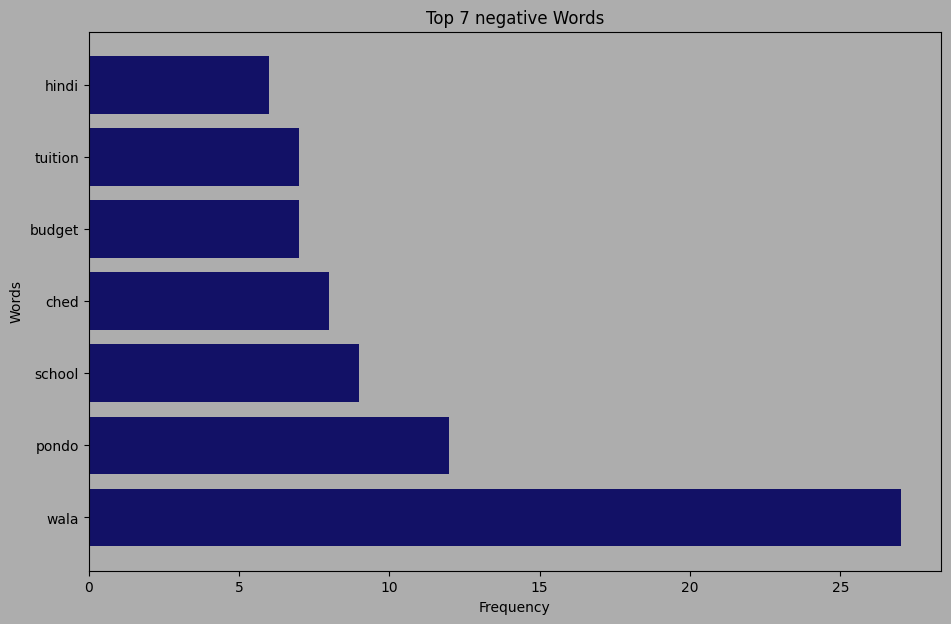

In [28]:
# top 5 negative comments
x = df1[df1['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'jqcrypto_negative_free_tution')

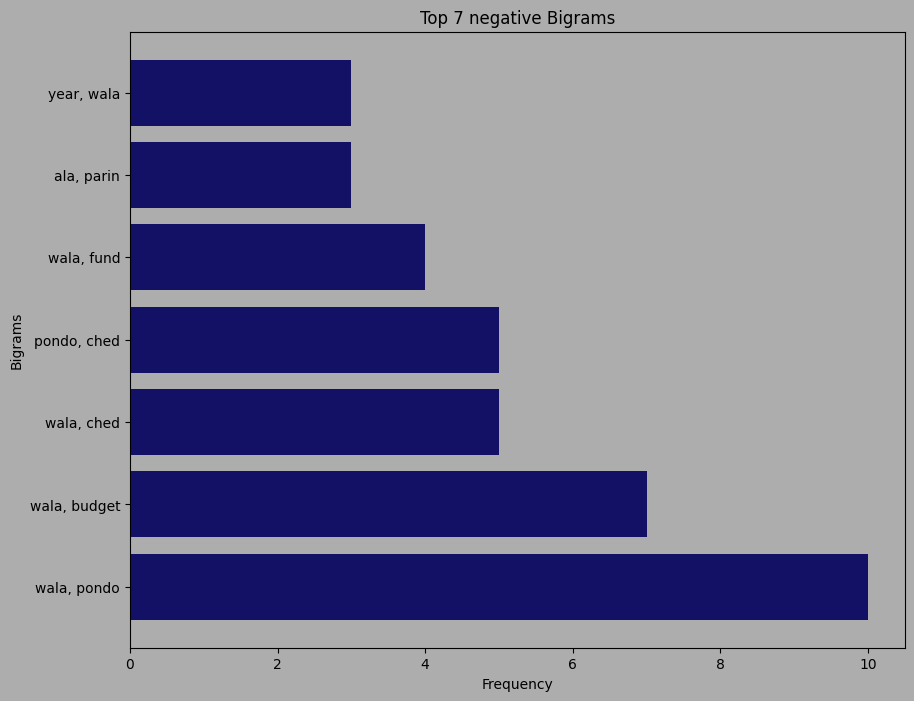

In [29]:
# top 5 negative bigrams 
negative.bigrams(7, 'negative', 'jqcrypto_negative_free_tution')

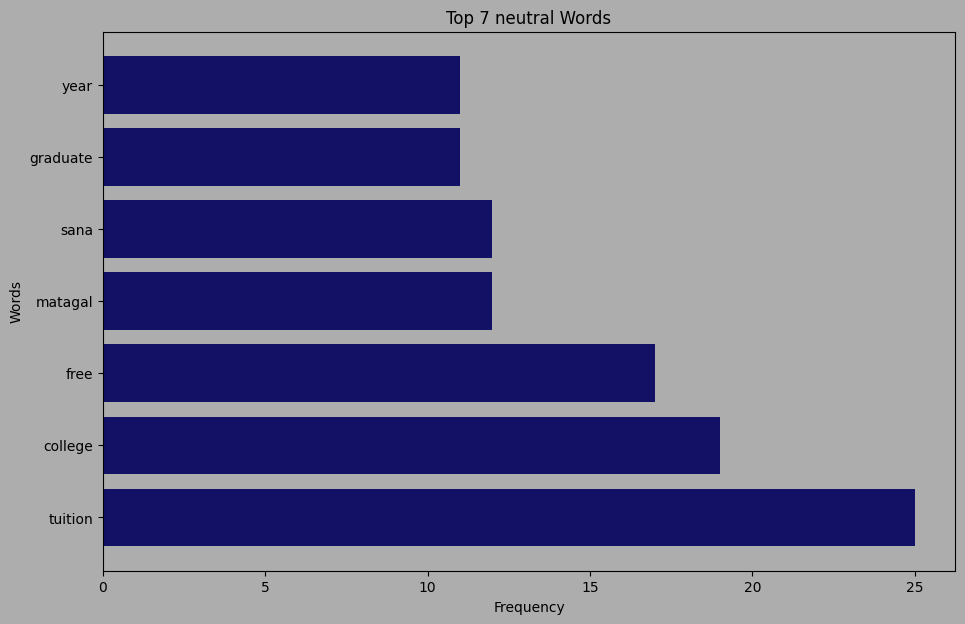

In [31]:
# top 5 neutral comments
x = df1[df1['CONTEXT-BASED'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'jqcrypto_neutral_free_tution')

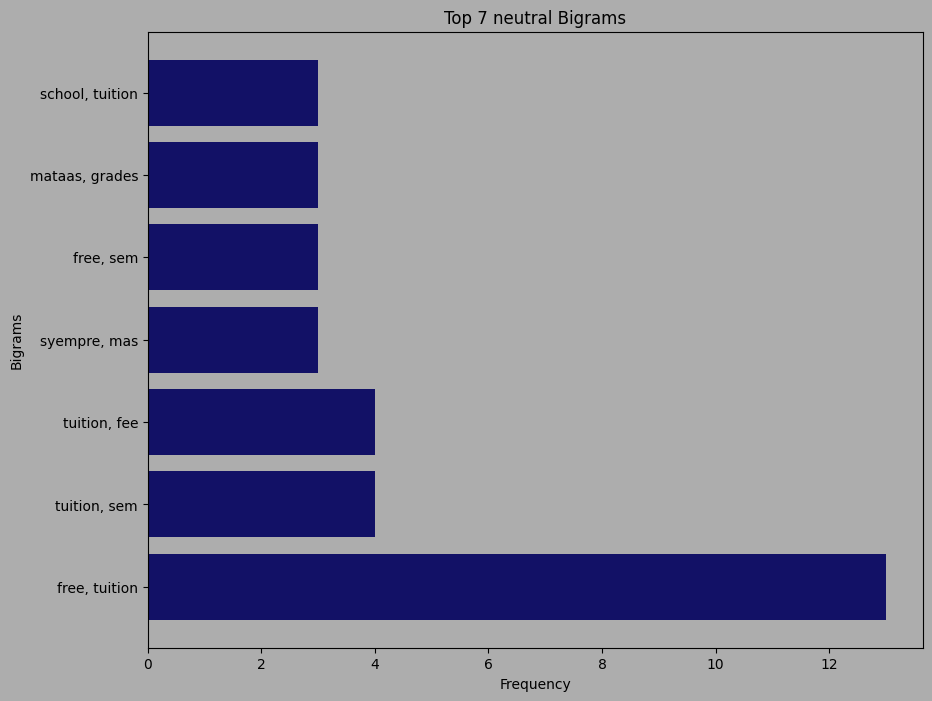

In [32]:
# top 5 negative comments _context_base_bam_related
neutral.bigrams(7, 'neutral', 'jqcrypto_neutral_free_tution')

## Phase 2: Free tuition sentiments of giucomia's video

### A. Facts and analysis

In [33]:
df2 = free_tuition.df[free_tuition.df['Account'] == 'giucomia']

In [34]:
df2['CONTEXT-BASED'].value_counts() 

1.0    149
2.0    129
0.0     72
Name: CONTEXT-BASED, dtype: int64

In [35]:
eda_giucomia = eda(df2, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED', folder='giucomia')

In [36]:
eda_giucomia.df['features_string_format'].notnull().sum().sum()

353

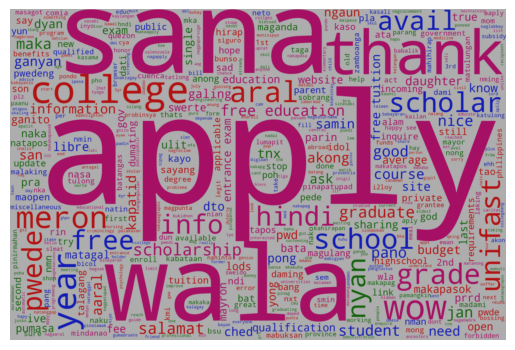

In [37]:
eda_giucomia.generate_wordcloud(filename='giucomia_all_comment_free_tuition')

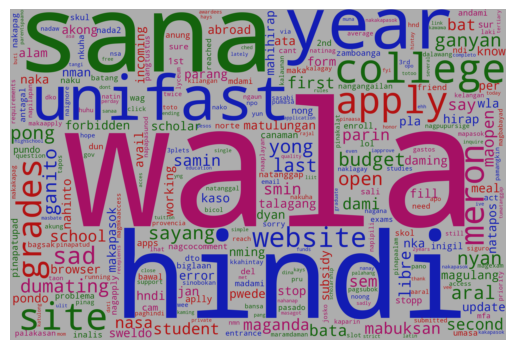

In [38]:
eda_giucomia.generate_wordcloud('giucomia_negative_free_tution', 'CONTEXT-BASED', 0.0)

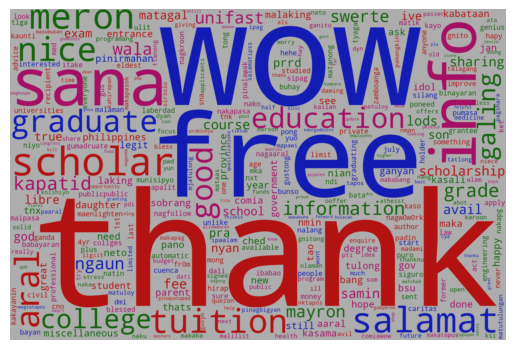

In [39]:
eda_giucomia.generate_wordcloud('giucomia_positive_free_tution', 'CONTEXT-BASED', 2.0)

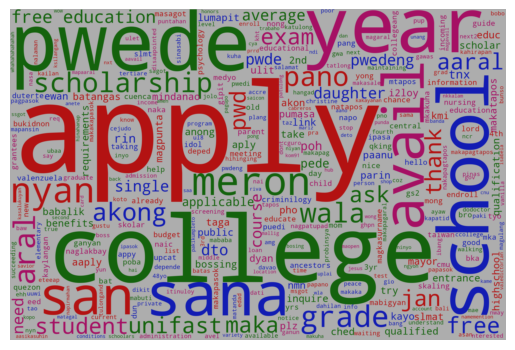

In [40]:
eda_giucomia.generate_wordcloud('giucomia_neutral_free_tution', 'CONTEXT-BASED', 1.0)

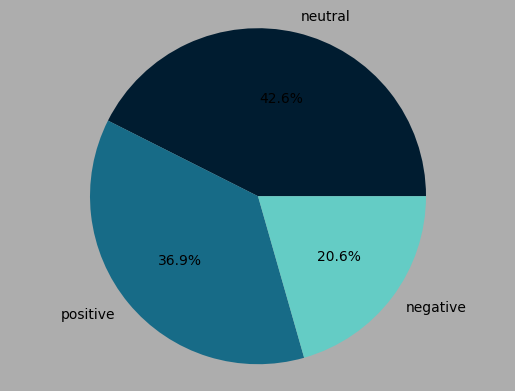

In [41]:
eda_giucomia.pie_sentiment('giucomia_free_tution', 'CONTEXT-BASED')

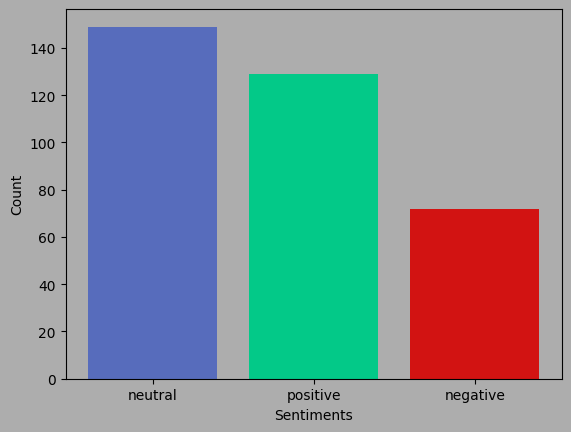

In [42]:
eda_giucomia.bar_sentiment('giucomia_free_tution', 'CONTEXT-BASED')

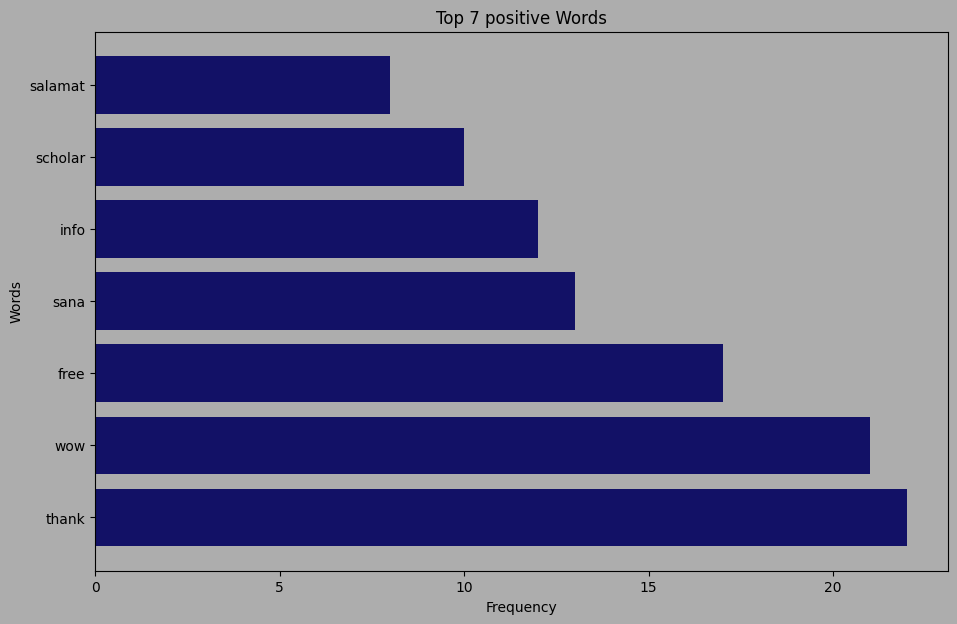

In [43]:
# top 7 positive comments
x = df2[df2['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'giucomia_positive_context_base_free_tution')

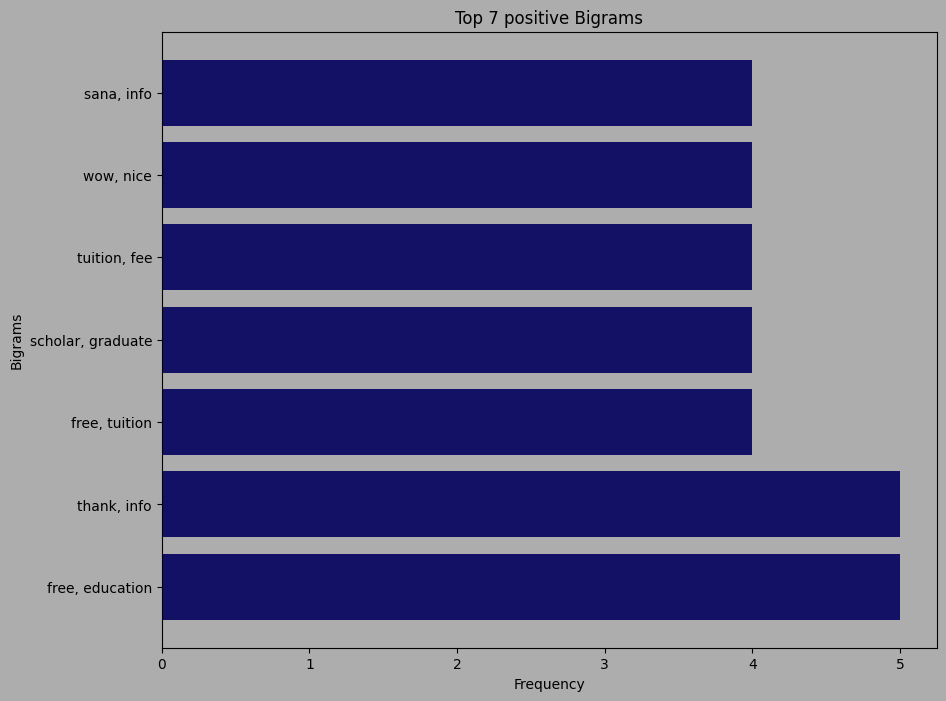

In [44]:
# top 7 positive bigrams
positive.bigrams(7, 'positive', 'giucomia_positive_context_base_free_tution')

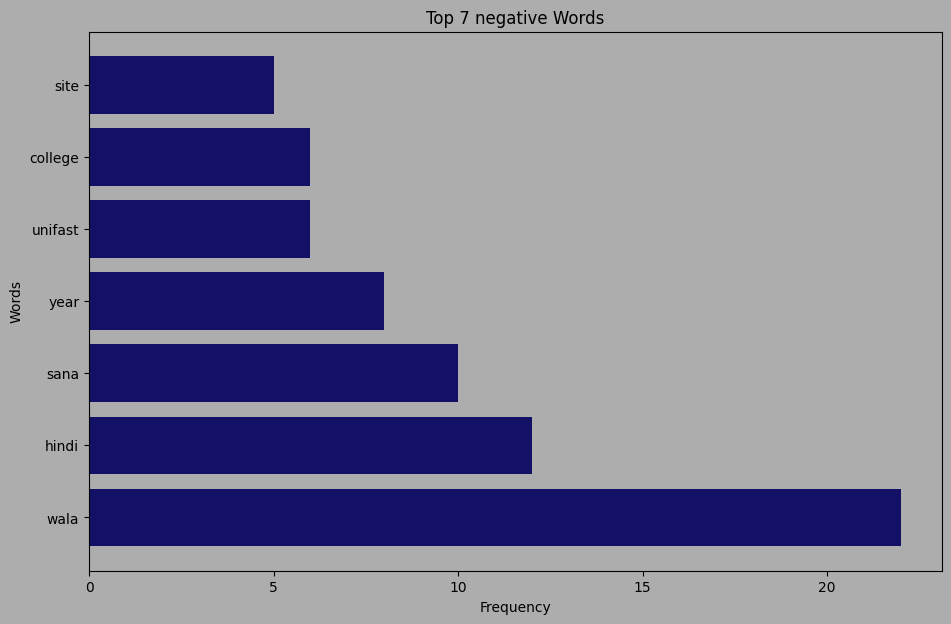

In [45]:
# top 7 negative comments
x = df2[df2['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'giucomia_negative_context_base_free_tution')

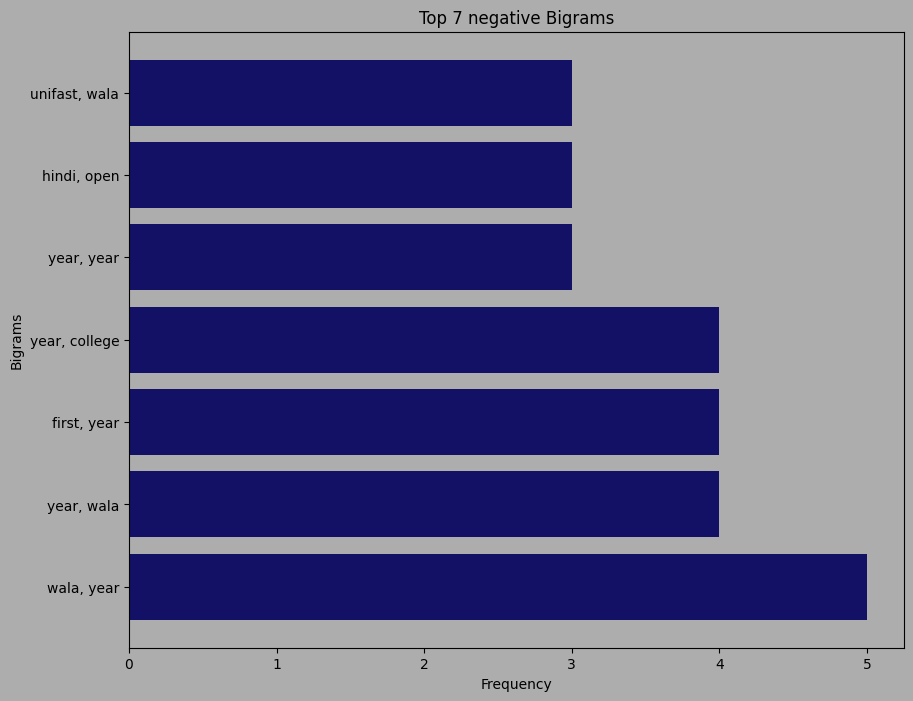

In [46]:
# top 7 negative bigrams 
negative.bigrams(7, 'negative', 'giucomia_negative_context_base_free_tution')

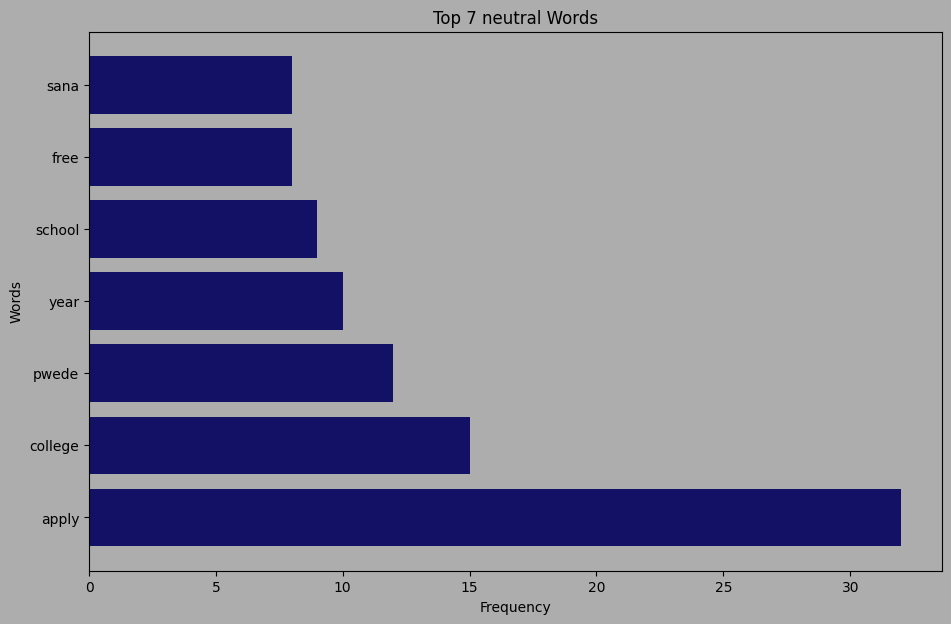

In [47]:
# top 7 neutral comments
x = df2[df2['CONTEXT-BASED'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'giucomia_neutral_context_base_free_tution')

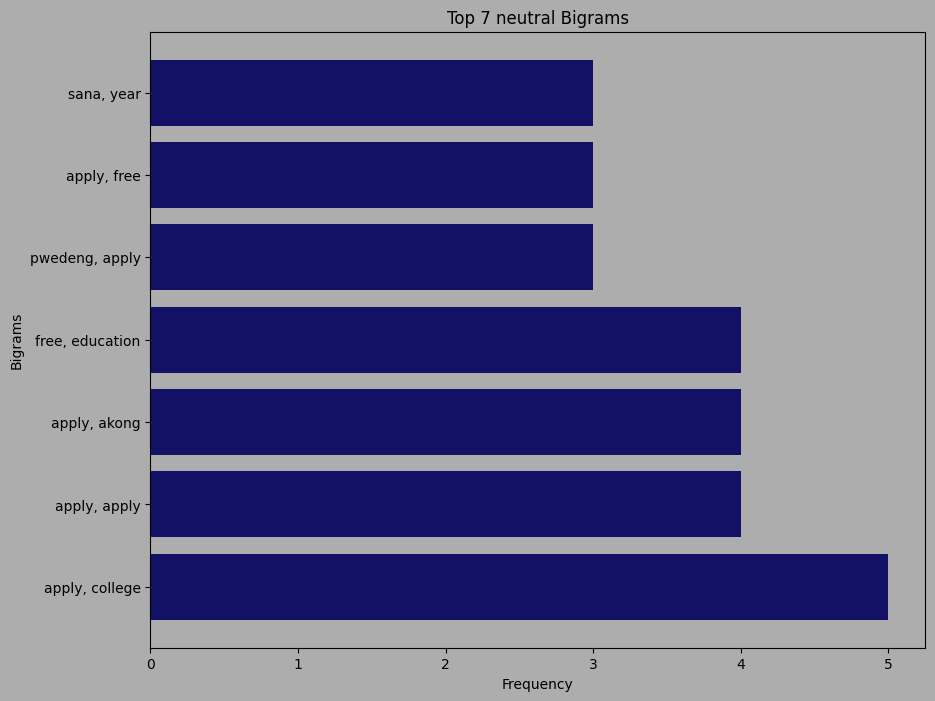

In [48]:
# top 7 nuetral comments _context_base_bam_related
neutral.bigrams(7, 'neutral', 'giucomia_neutral_context_base_free_tution')

## Phase 3: Free tuition sentiments of janelletee's video

### A. Facts and analysis

In [49]:
df3 = free_tuition.df[free_tuition.df['Account'] == 'janelletee']

In [50]:
df3['CONTEXT-BASED'].value_counts() 

1.0    71
0.0    13
2.0     9
Name: CONTEXT-BASED, dtype: int64

In [51]:
eda_janelletee = eda(df3, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED', folder='janelletee')

In [52]:
eda_janelletee.df['features_string_format'].notnull().sum().sum()

93

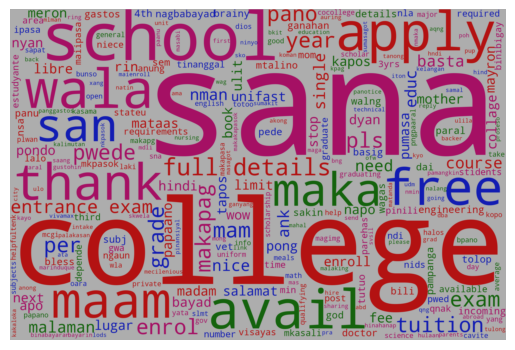

In [53]:
eda_janelletee.generate_wordcloud(filename='janelletee_all_comment_free_tuition')

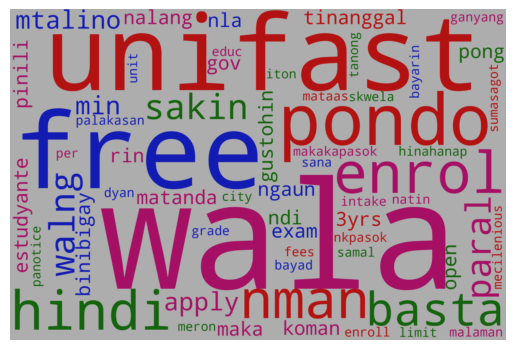

In [54]:
eda_janelletee.generate_wordcloud('janelletee_negative_free_tution', 'CONTEXT-BASED', 0.0)

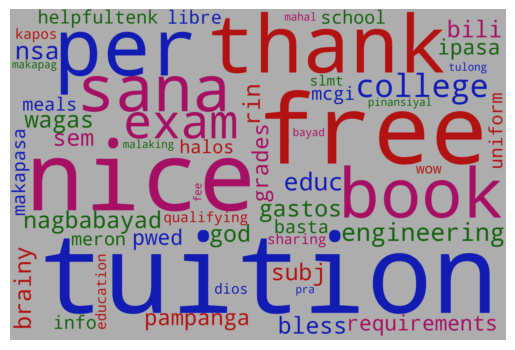

In [55]:
eda_janelletee.generate_wordcloud('janelletee_positive_free_tution', 'CONTEXT-BASED', 2.0)

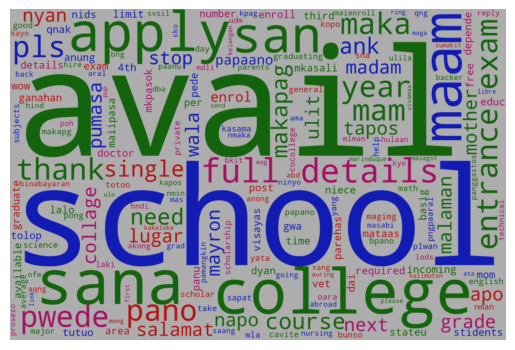

In [56]:
eda_janelletee.generate_wordcloud('janelletee_neutral_free_tution', 'CONTEXT-BASED', 1.0)

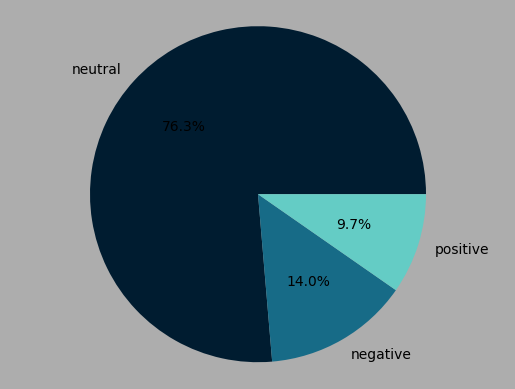

In [57]:
eda_janelletee.pie_sentiment('janelletee_free_tution', 'CONTEXT-BASED')

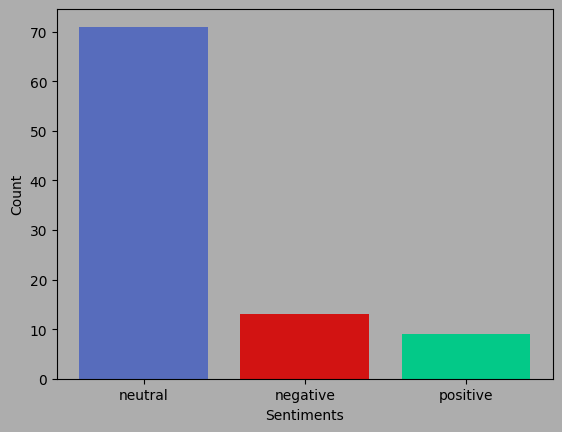

In [58]:
eda_janelletee.bar_sentiment('janelletee_free_tution', 'CONTEXT-BASED')

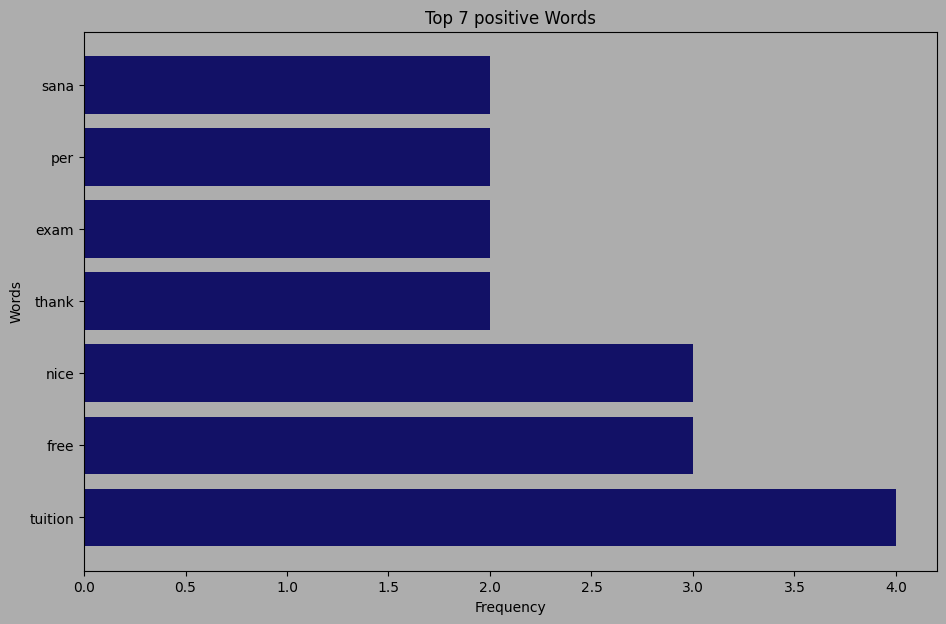

In [59]:
# top 7 positive comments
x = df3[df3['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'janelletee_positive_context_base_free_tution')

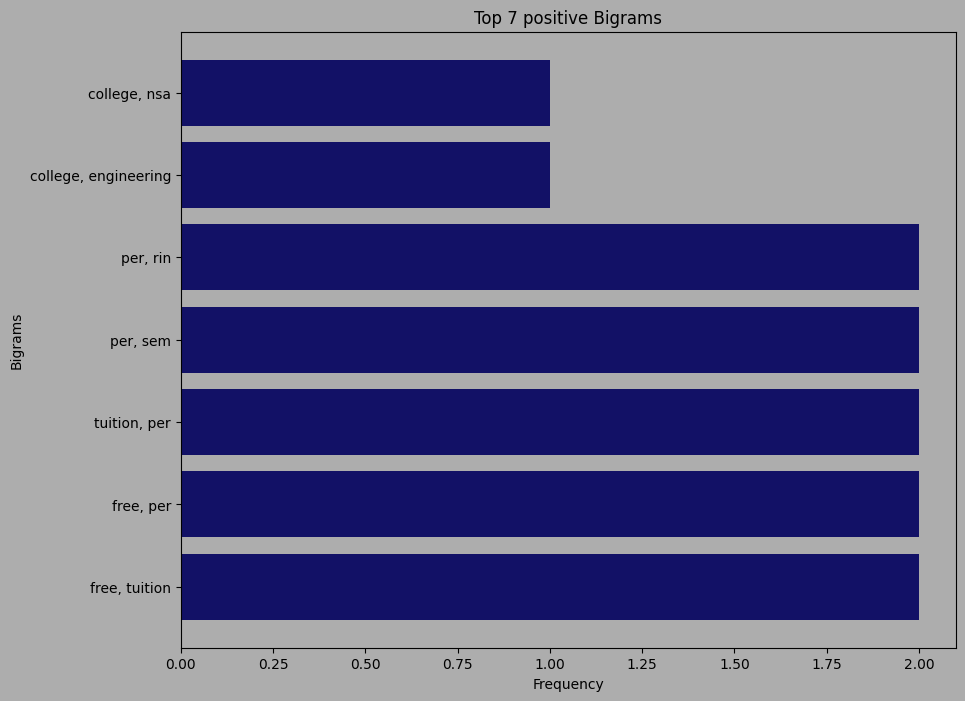

In [60]:
# top 7 positive bigrams
positive.bigrams(7, 'positive', 'janelletee_positive_context_base_free_tution')

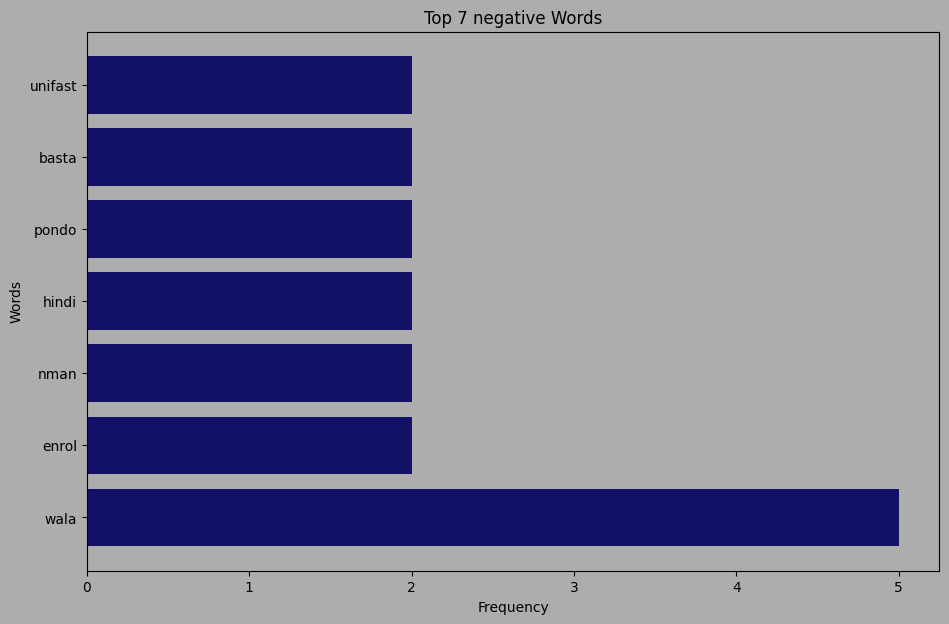

In [61]:
# top 7 negative comments
x = df3[df3['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'janelletee_negative_context_base_free_tution')

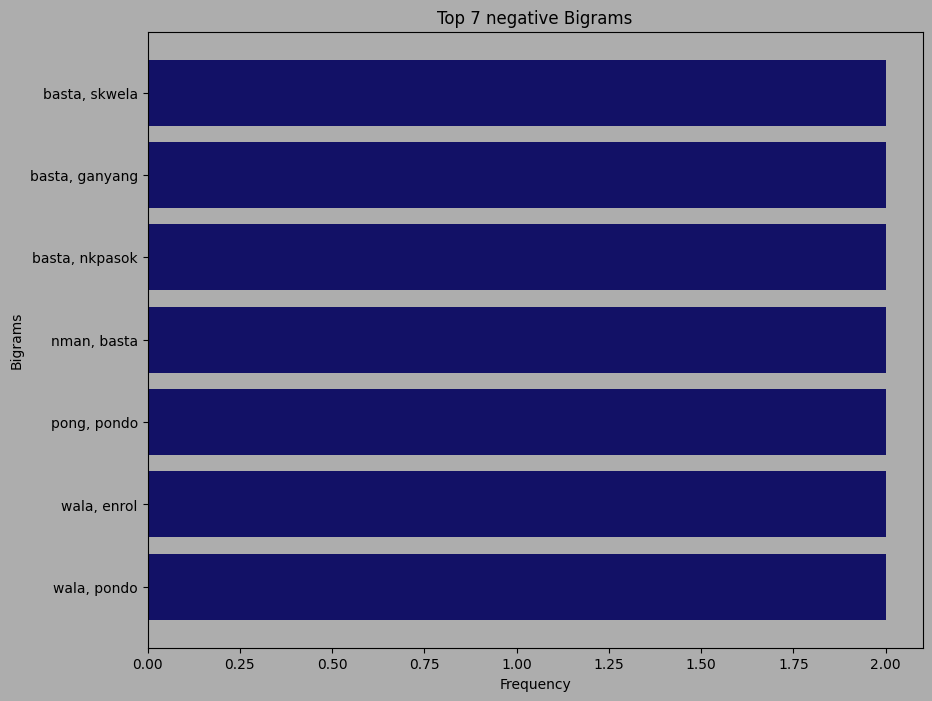

In [62]:
# top 7 negative bigrams 
negative.bigrams(7, 'negative', 'janelletee_negative_context_base_free_tution')

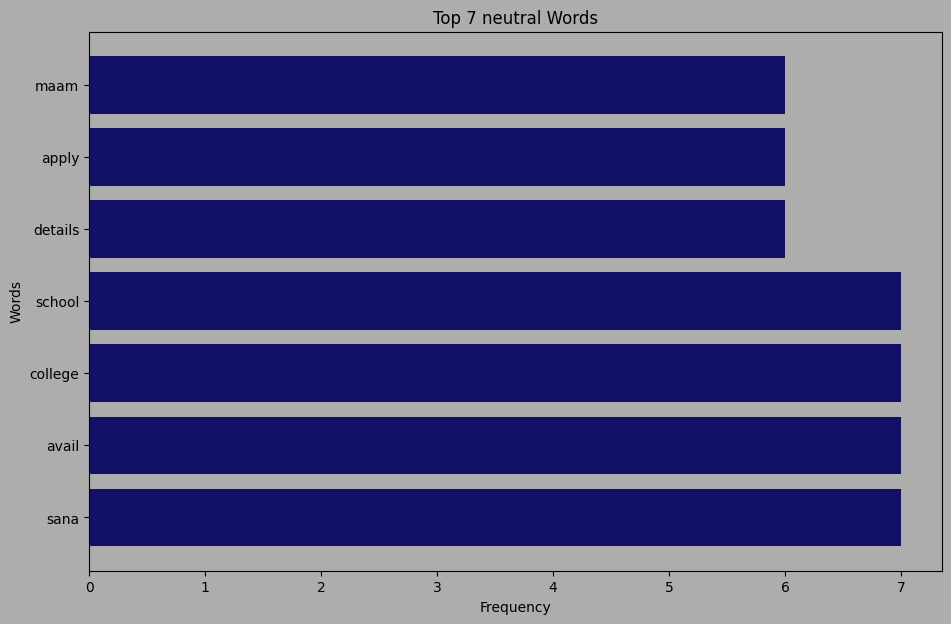

In [63]:
# top 7 neutral comments
x = df3[df3['CONTEXT-BASED'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'janelletee_neutral_context_base_free_tution')

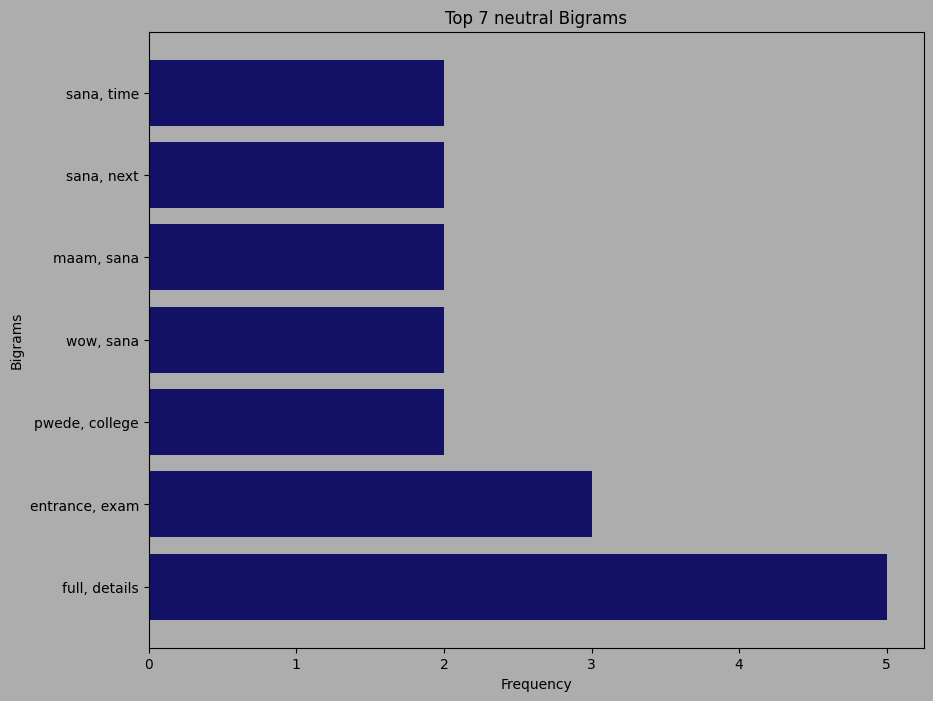

In [64]:
# top 7 nuetral comments _context_base_bam_related
neutral.bigrams(7, 'neutral', 'janelletee_neutral_context_base_free_tution')

## Phase 4: Free tuition sentiments of papabiii's video

### A. Facts and analysis

In [65]:
df4 = free_tuition.df[free_tuition.df['Account'] == 'papabiii']

In [66]:
df4['CONTEXT-BASED'].value_counts() 

1.0    9
0.0    7
2.0    7
Name: CONTEXT-BASED, dtype: int64

In [67]:
eda_papabiii = eda(df4, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED', folder='papabiii')

In [68]:
eda_papabiii.df['features_string_format'].notnull().sum().sum()

23

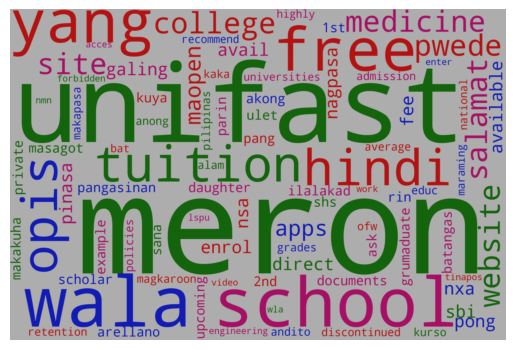

In [69]:
eda_papabiii.generate_wordcloud(filename='papabiii_all_comment_free_tuition')

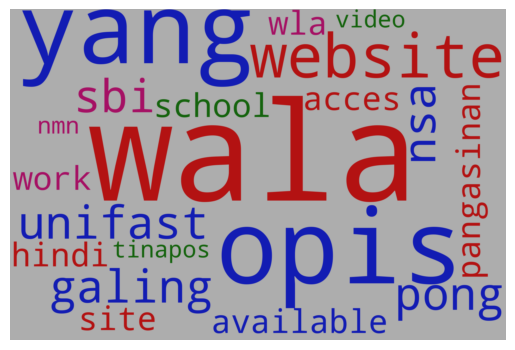

In [70]:
eda_papabiii.generate_wordcloud('papabiii_negative_free_tution', 'CONTEXT-BASED', 0.0)

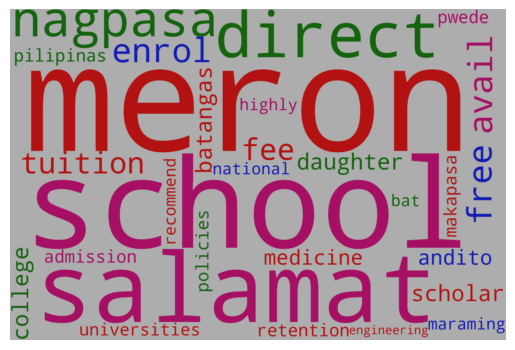

In [71]:
eda_papabiii.generate_wordcloud('papabiii_positive_free_tution', 'CONTEXT-BASED', 2.0)

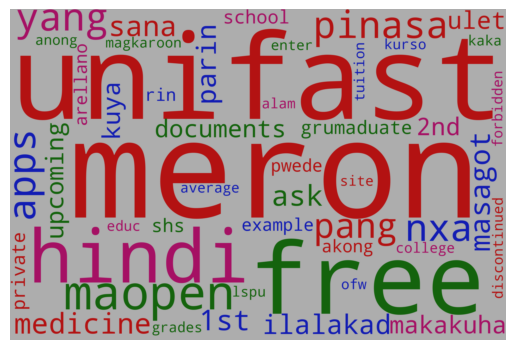

In [72]:
eda_papabiii.generate_wordcloud('papabiii_neutral_free_tution', 'CONTEXT-BASED', 1.0)

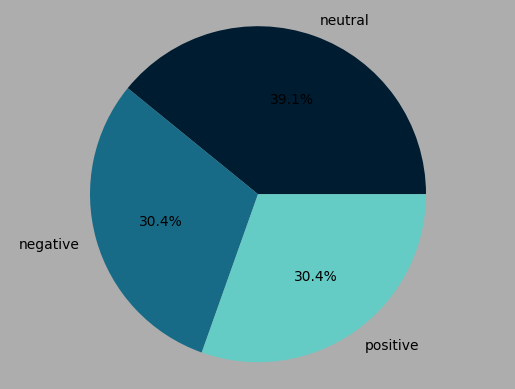

In [73]:
eda_papabiii.pie_sentiment('papabiii_free_tution', 'CONTEXT-BASED')

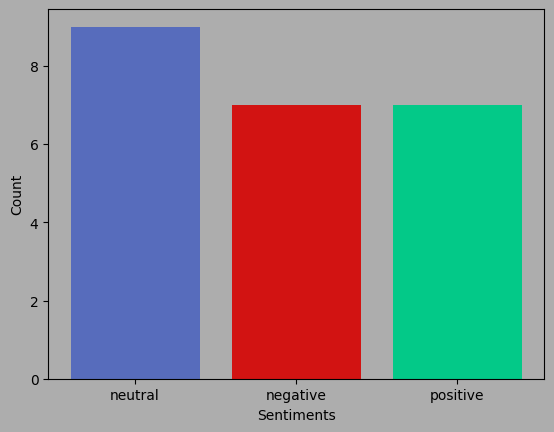

In [74]:
eda_papabiii.bar_sentiment('papabiii_free_tution', 'CONTEXT-BASED')

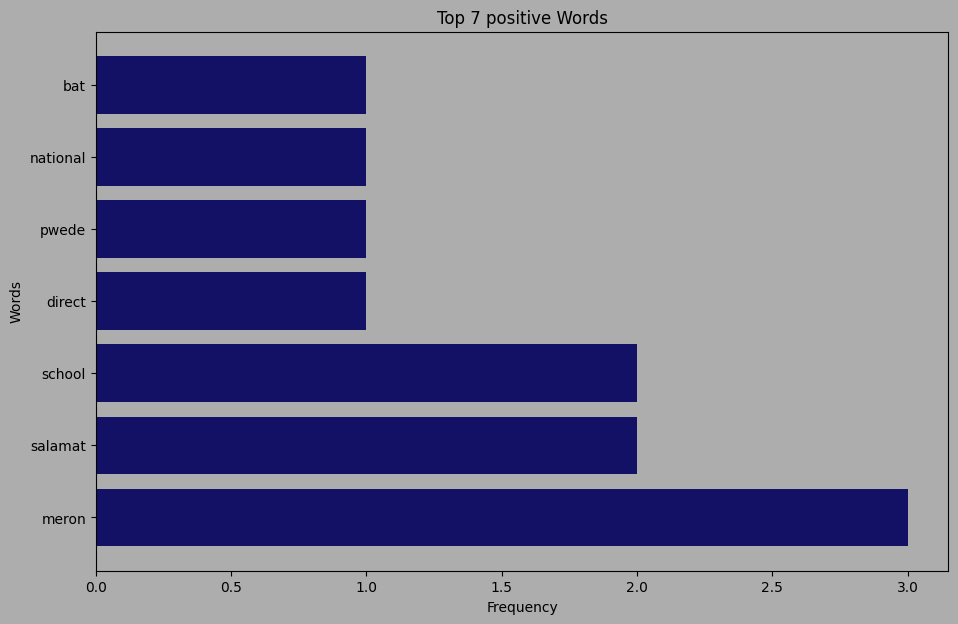

In [75]:
# top 7 positive comments
x = df4[df4['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'papabiii_positive_context_base_free_tution')

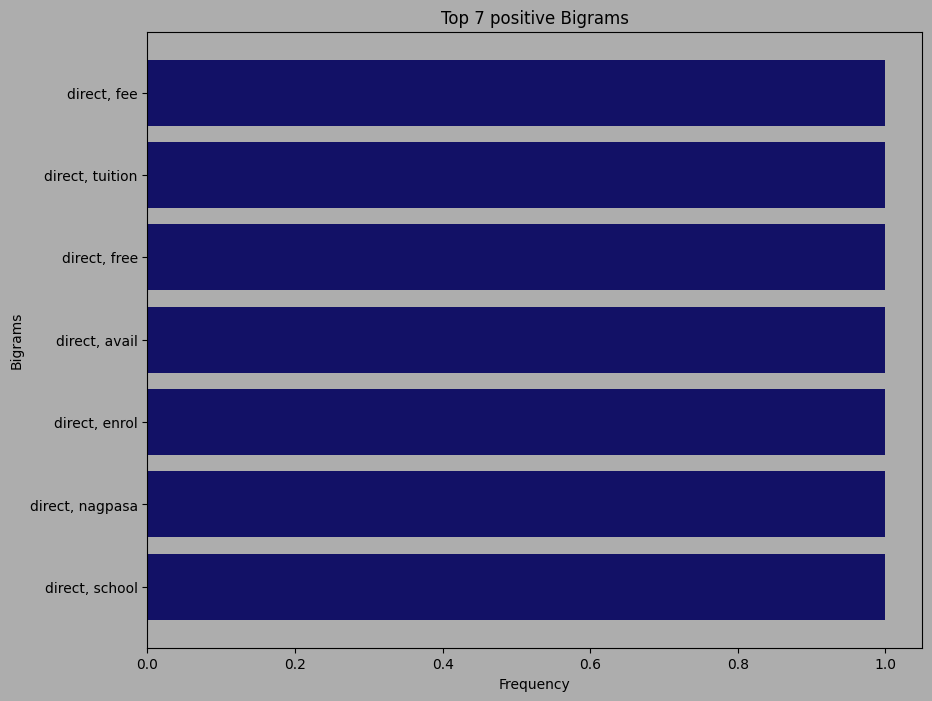

In [76]:
# top 7 positive bigrams
positive.bigrams(7, 'positive', 'papabiii_positive_context_base_free_tution')

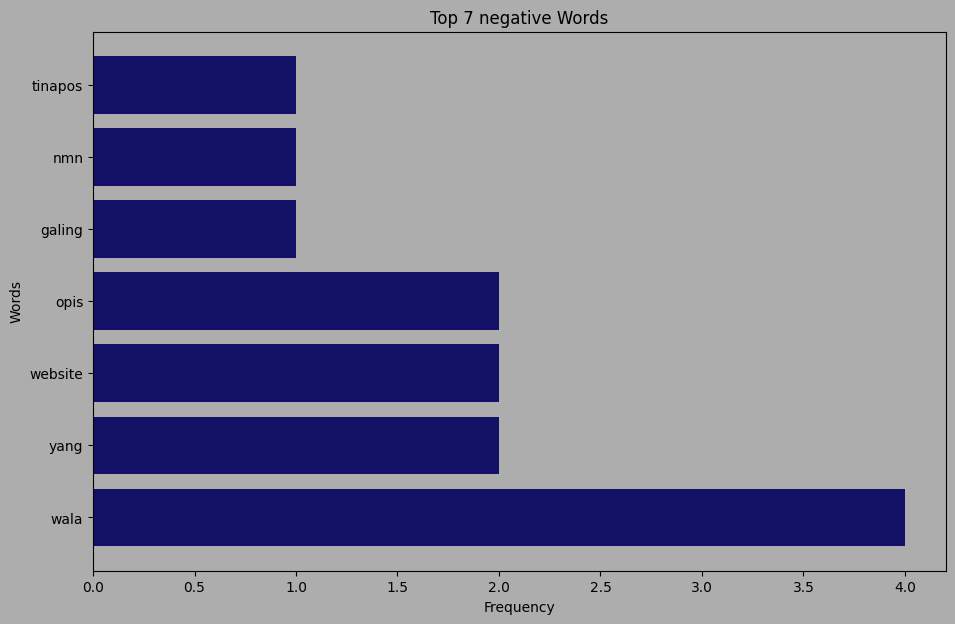

In [77]:
# top 7 negative comments
x = df4[df4['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'papabiii_negative_context_base_free_tution')

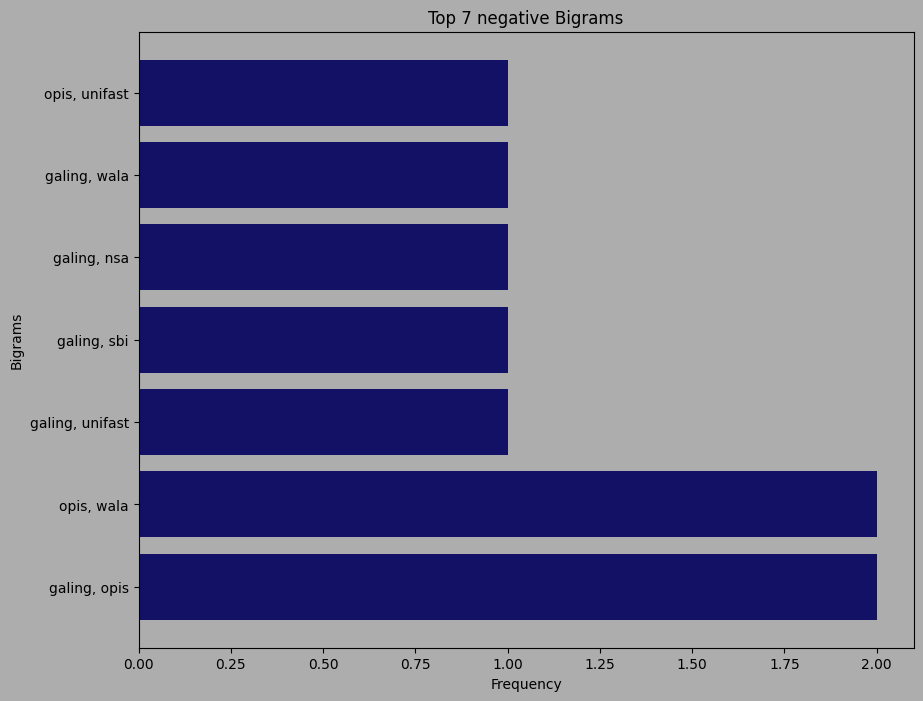

In [78]:
# top 7 negative bigrams 
negative.bigrams(7, 'negative', 'papabiii_negative_context_base_free_tution')

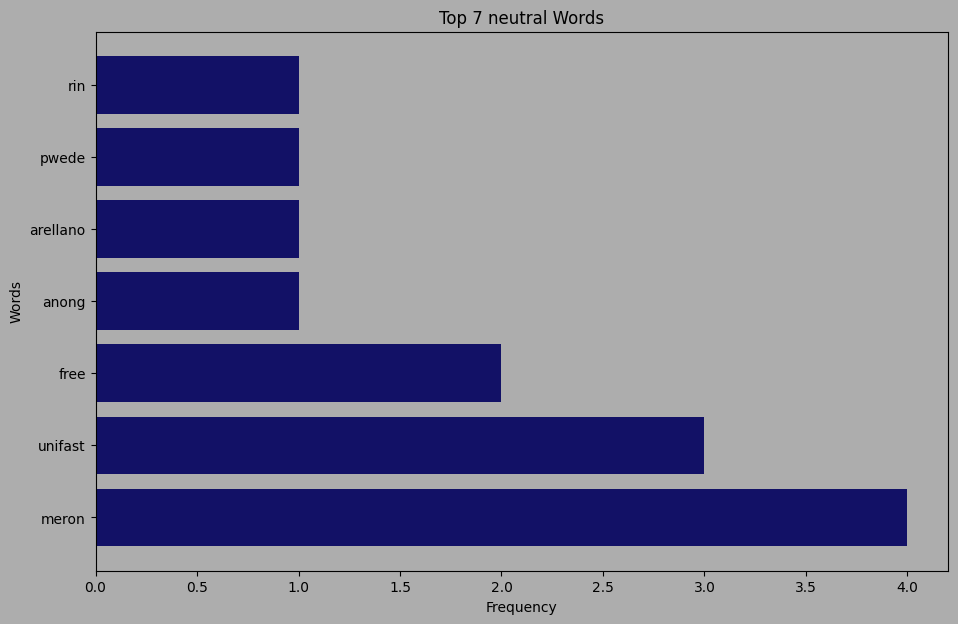

In [79]:
# top 7 neutral comments
x = df4[df4['CONTEXT-BASED'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'papabiii_neutral_context_base_free_tution')

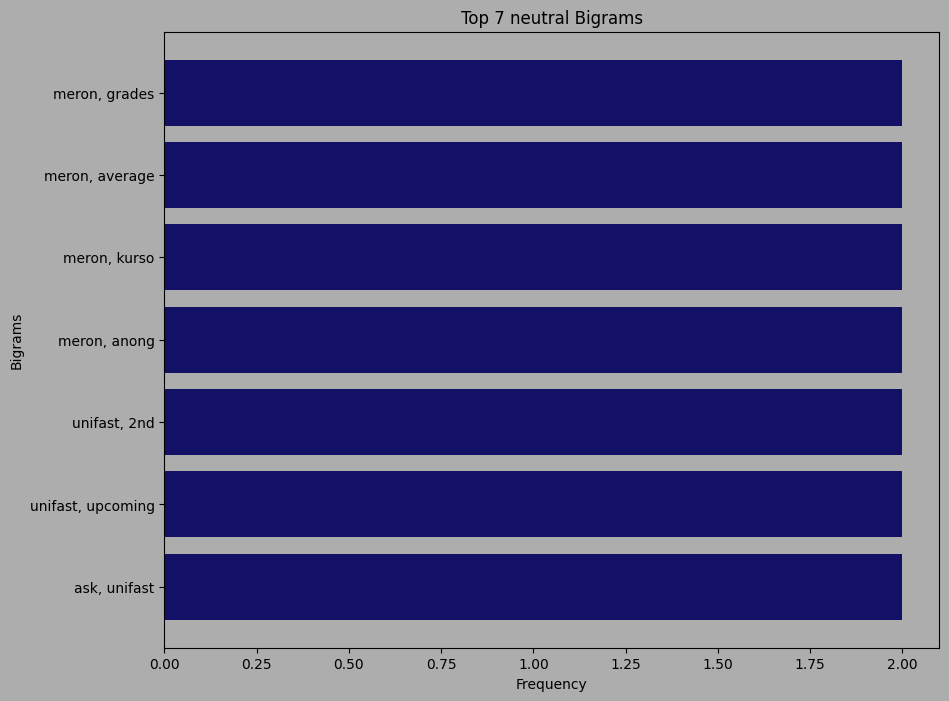

In [80]:
# top 7 nuetral comments _context_base_bam_related
neutral.bigrams(7, 'neutral', 'papabiii_neutral_context_base_free_tution')

## Phase 5: Free tuition sentiments of cryptopareh's video

### A. Facts and analysis

In [81]:
df5 = free_tuition.df[free_tuition.df['Account'] == 'cryptopareh']

In [82]:
df5['CONTEXT-BASED'].value_counts() 

2.0    9
1.0    5
Name: CONTEXT-BASED, dtype: int64

In [83]:
eda_cryptopareh = eda(df5, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED', folder='cryptopareh')

In [84]:
eda_cryptopareh.df['features_string_format'].notnull().sum().sum()

14

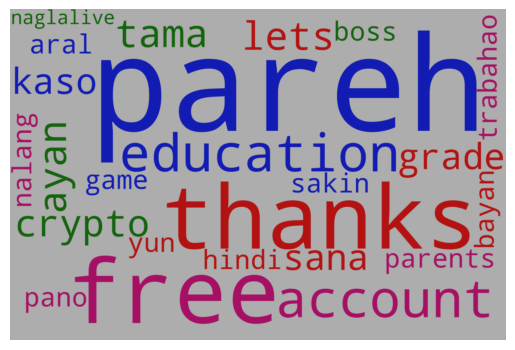

In [85]:
eda_cryptopareh.generate_wordcloud(filename='cryptopareh_all_comment_free_tuition')

In [87]:
#eda_cryptopareh.generate_wordcloud('cryptopareh_negative_free_tution', 'CONTEXT-BASED', 0.0)

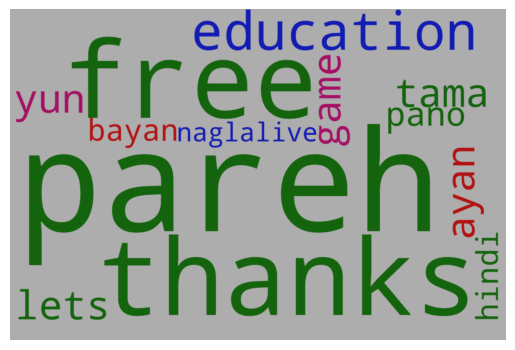

In [88]:
eda_cryptopareh.generate_wordcloud('cryptopareh_positive_free_tution', 'CONTEXT-BASED', 2.0)

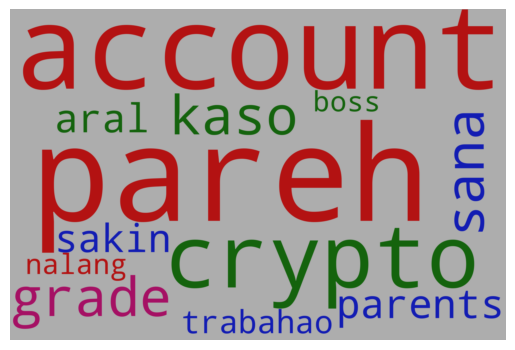

In [89]:
eda_cryptopareh.generate_wordcloud('cryptopareh_neutral_free_tution', 'CONTEXT-BASED', 1.0)

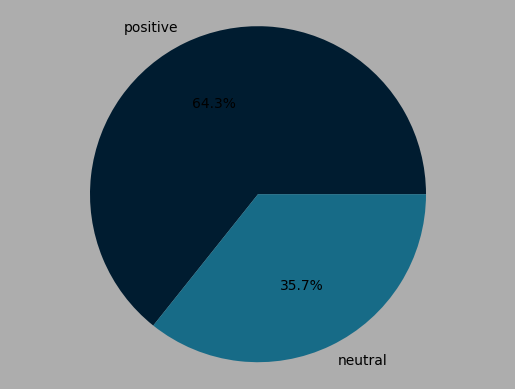

In [90]:
eda_cryptopareh.pie_sentiment('cryptopareh_free_tution', 'CONTEXT-BASED')

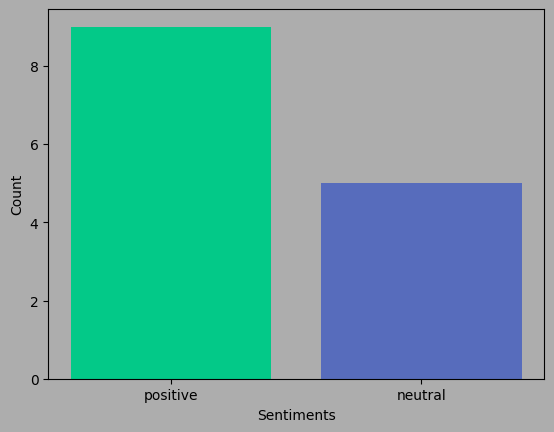

In [91]:
eda_cryptopareh.bar_sentiment('cryptopareh_free_tution', 'CONTEXT-BASED')

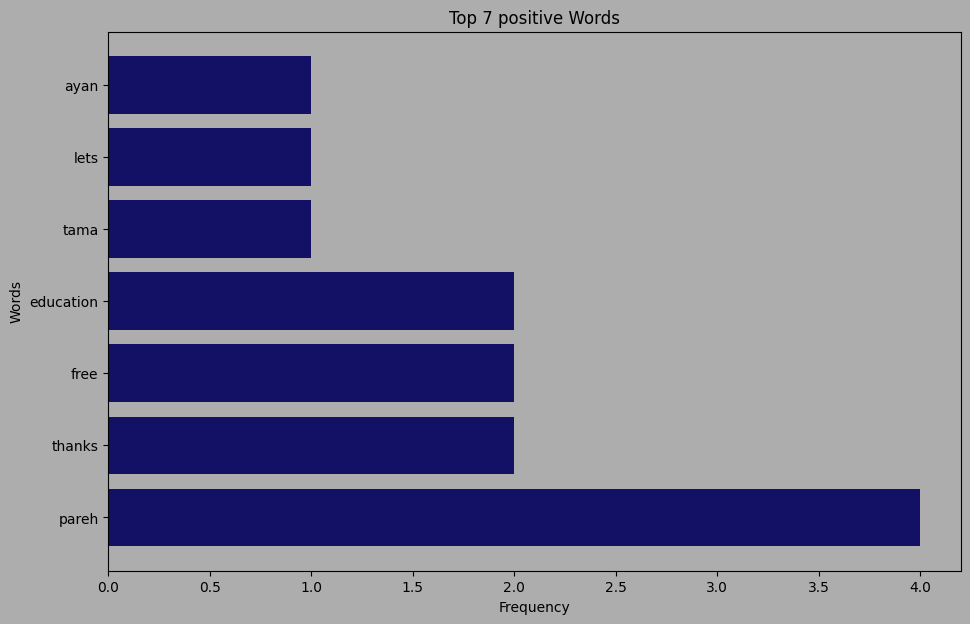

In [92]:
# top 7 positive comments
x = df5[df5['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'cryptopareh_positive_context_base_free_tution')

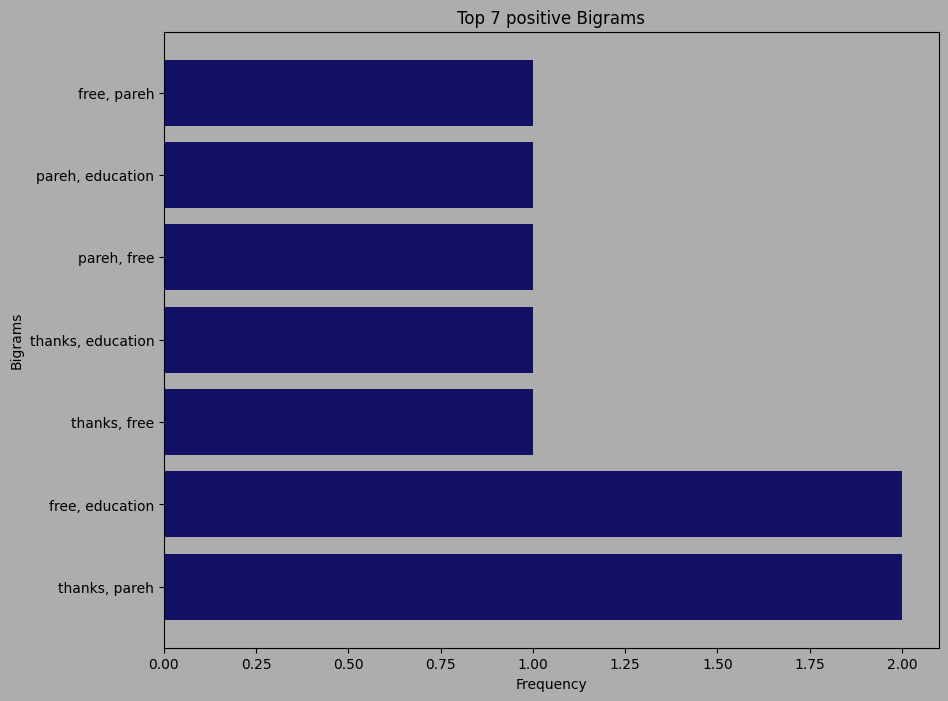

In [93]:
# top 7 positive bigrams
positive.bigrams(7, 'positive', 'cryptopareh_positive_context_base_free_tution')

C:\project\hunting\classes.py:273: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word_counts = pd.Series(tokens).value_counts()


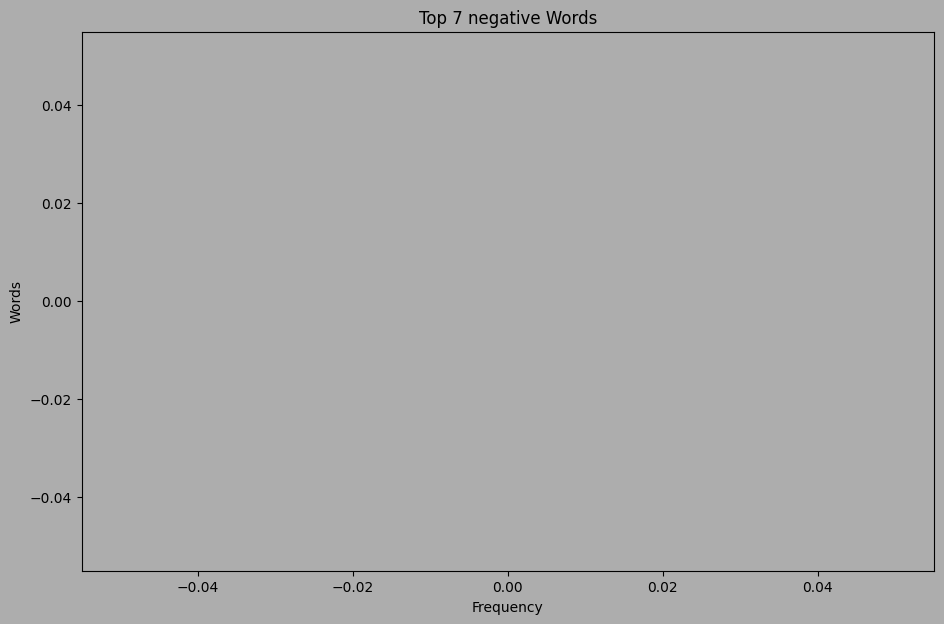

In [94]:
# top 7 negative comments
x = df5[df5['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'cryptopareh_negative_context_base_free_tution')

In [98]:
# top 7 negative bigrams 
negative.bigrams(7, 'negative', 'cryptopareh_negative_context_base_free_tution')

ValueError: not enough values to unpack (expected 2, got 0)

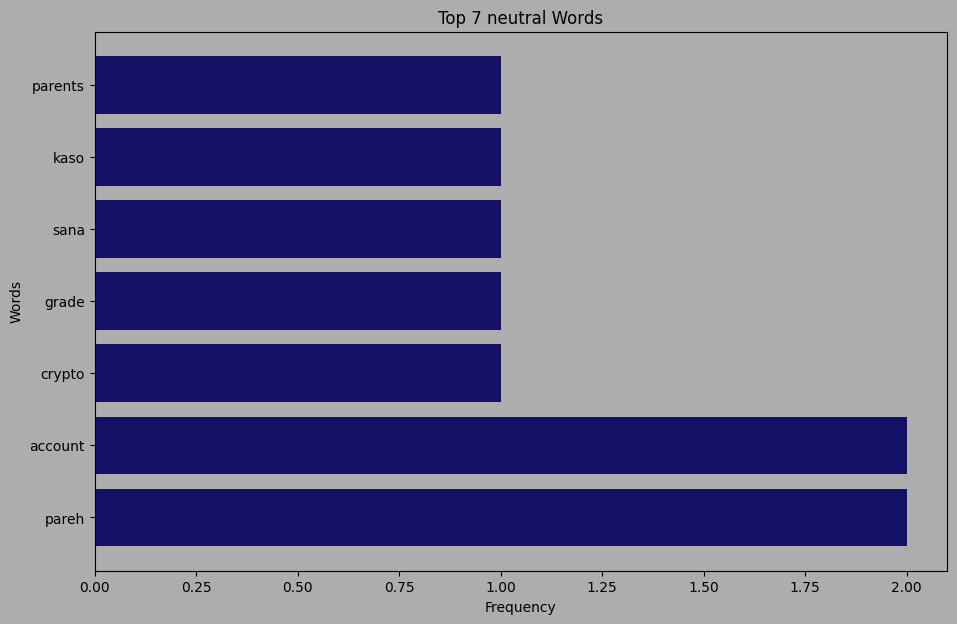

In [99]:
# top 7 neutral comments
x = df5[df5['CONTEXT-BASED'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'cryptopareh_neutral_context_base_free_tution')

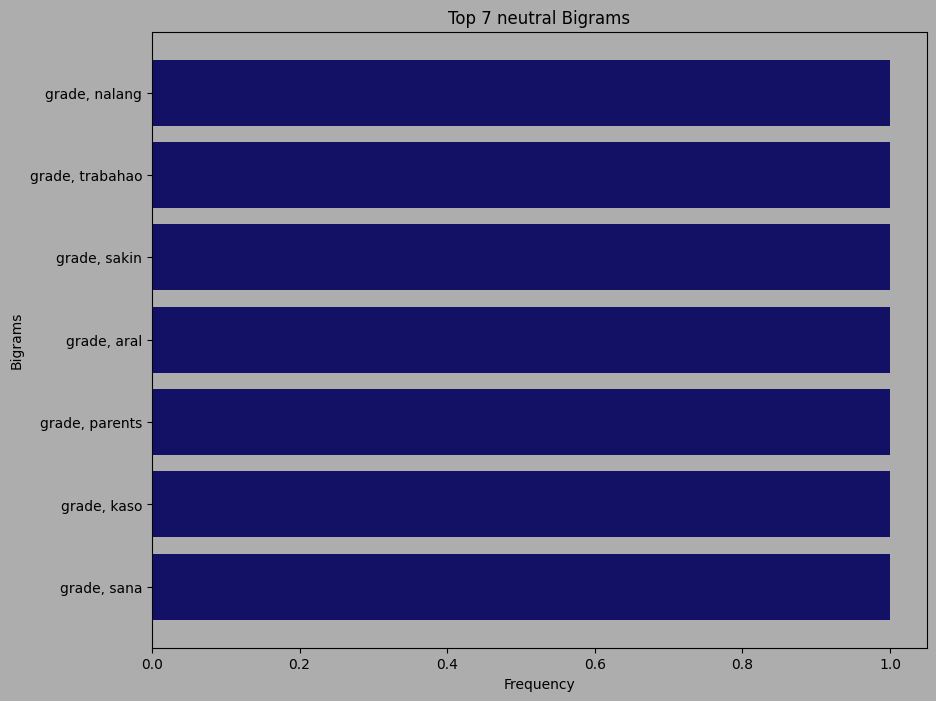

In [100]:
# top 7 nuetral comments _context_base_bam_related
neutral.bigrams(7, 'neutral', 'cryptopareh_neutral_context_base_free_tution')

## Phase 6: Free tuition sentiments of pozlifewithleo's video

### A. Facts and analysis

In [101]:
df6 = free_tuition.df[free_tuition.df['Account'] == 'pozlifewithleo']

In [102]:
df6['CONTEXT-BASED'].value_counts() 

2.0    8
1.0    3
Name: CONTEXT-BASED, dtype: int64

In [103]:
eda_pozlifewithleo = eda(df6, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED', folder='pozlifewithleo')

In [104]:
eda_pozlifewithleo.df['features_string_format'].notnull().sum().sum()

11

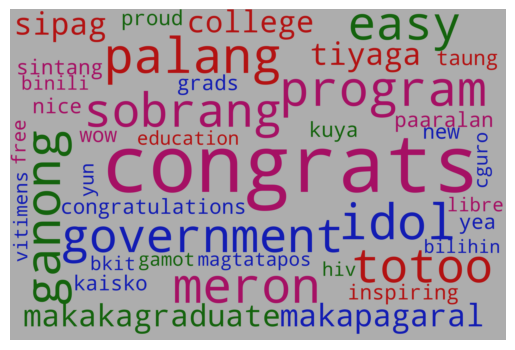

In [105]:
eda_pozlifewithleo.generate_wordcloud(filename='pozlifewithleo_all_comment_free_tuition')

In [107]:
#eda_pozlifewithleo.generate_wordcloud('pozlifewithleo_negative_free_tution', 'CONTEXT-BASED', 0.0)

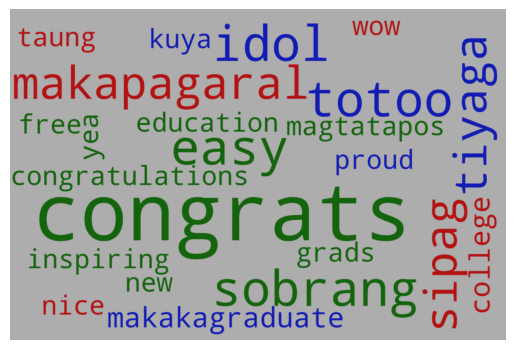

In [108]:
eda_pozlifewithleo.generate_wordcloud('pozlifewithleo_positive_free_tution', 'CONTEXT-BASED', 2.0)

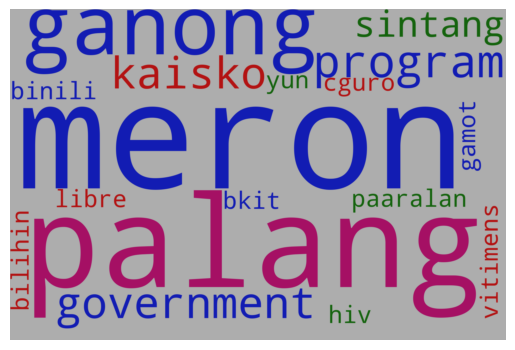

In [109]:
eda_pozlifewithleo.generate_wordcloud('pozlifewithleo_neutral_free_tution', 'CONTEXT-BASED', 1.0)

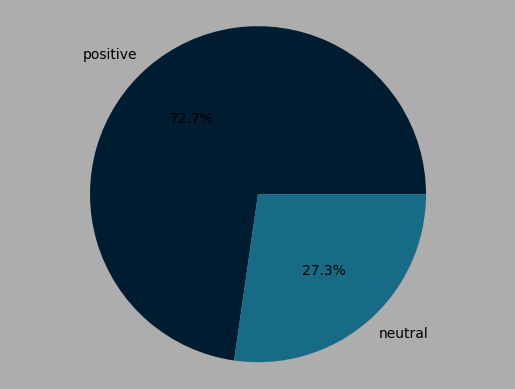

In [110]:
eda_pozlifewithleo.pie_sentiment('pozlifewithleo_free_tution', 'CONTEXT-BASED')

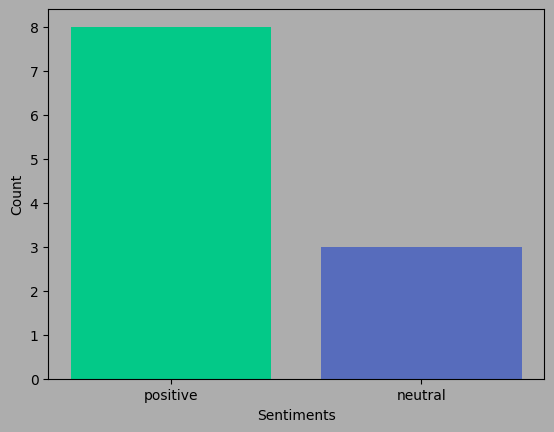

In [111]:
eda_pozlifewithleo.bar_sentiment('pozlifewithleo_free_tution', 'CONTEXT-BASED')

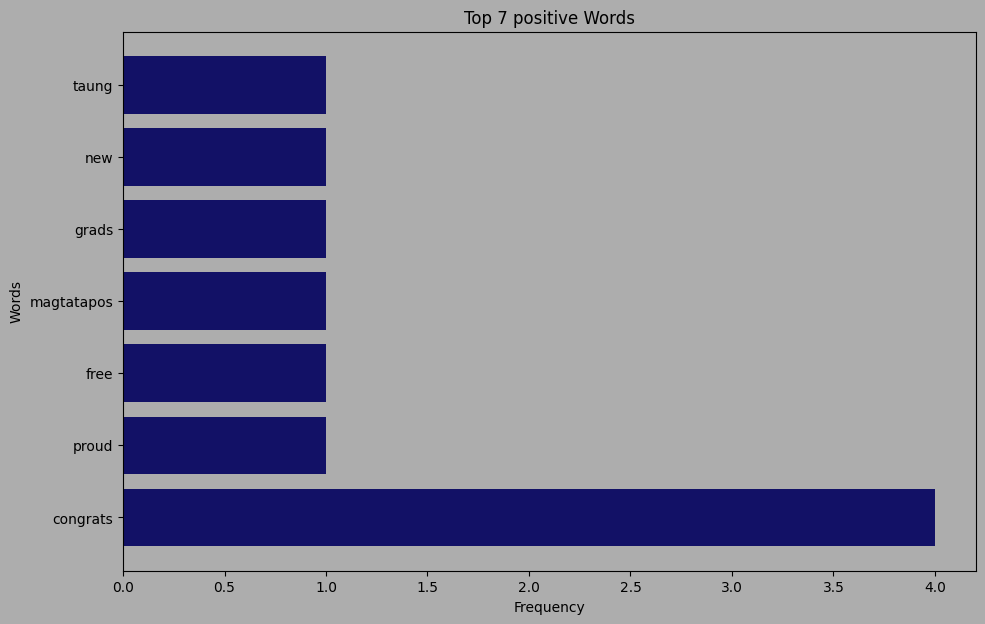

In [112]:
# top 7 positive comments
x = df6[df6['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'pozlifewithleo_positive_context_base_free_tution')

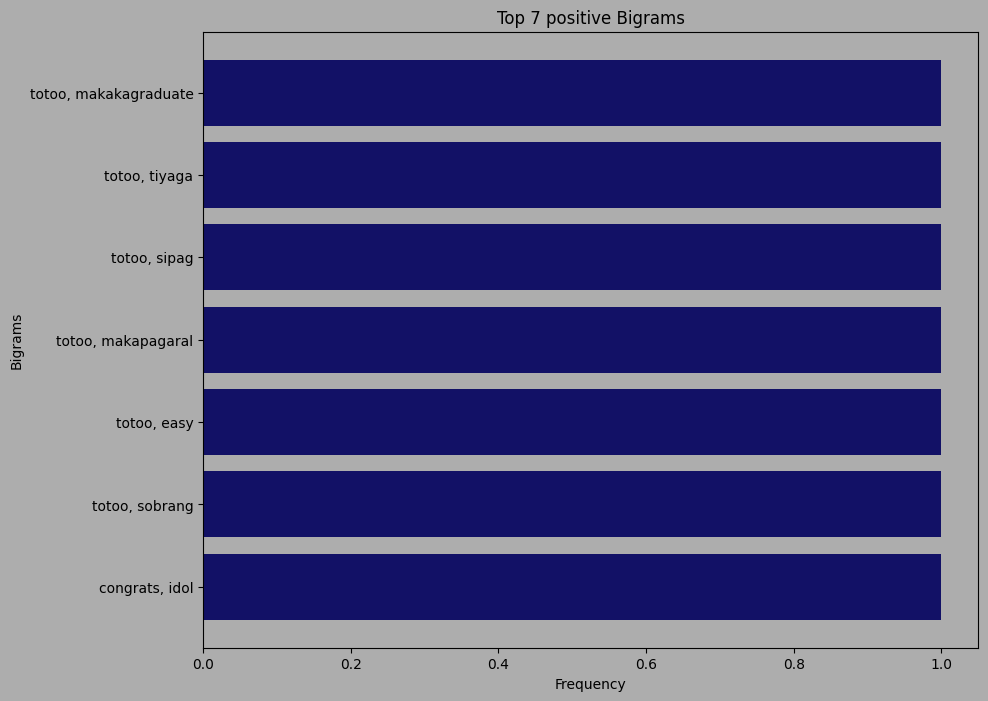

In [113]:
# top 7 positive bigrams
positive.bigrams(7, 'positive', 'pozlifewithleo_positive_context_base_free_tution')

In [ ]:
# top 7 negative comments
x = df6[df6['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'pozlifewithleo_negative_context_base_free_tution')

In [ ]:
# top 7 negative bigrams 
negative.bigrams(7, 'negative', 'pozlifewithleo_negative_context_base_free_tution')

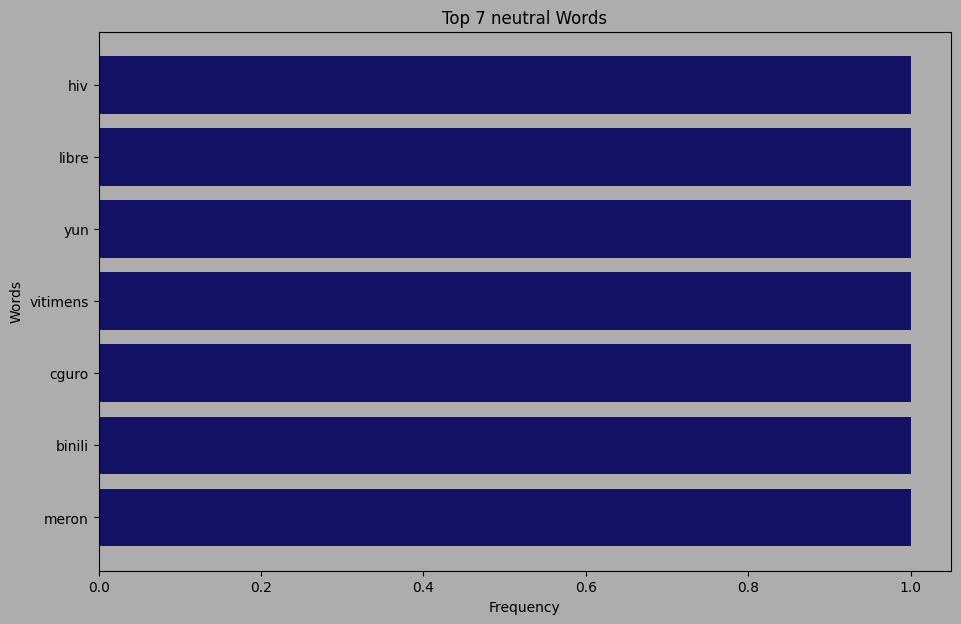

In [114]:
# top 7 neutral comments
x = df6[df6['CONTEXT-BASED'] == 1.0]
neutral = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'pozlifewithleo_neutral_context_base_free_tution')

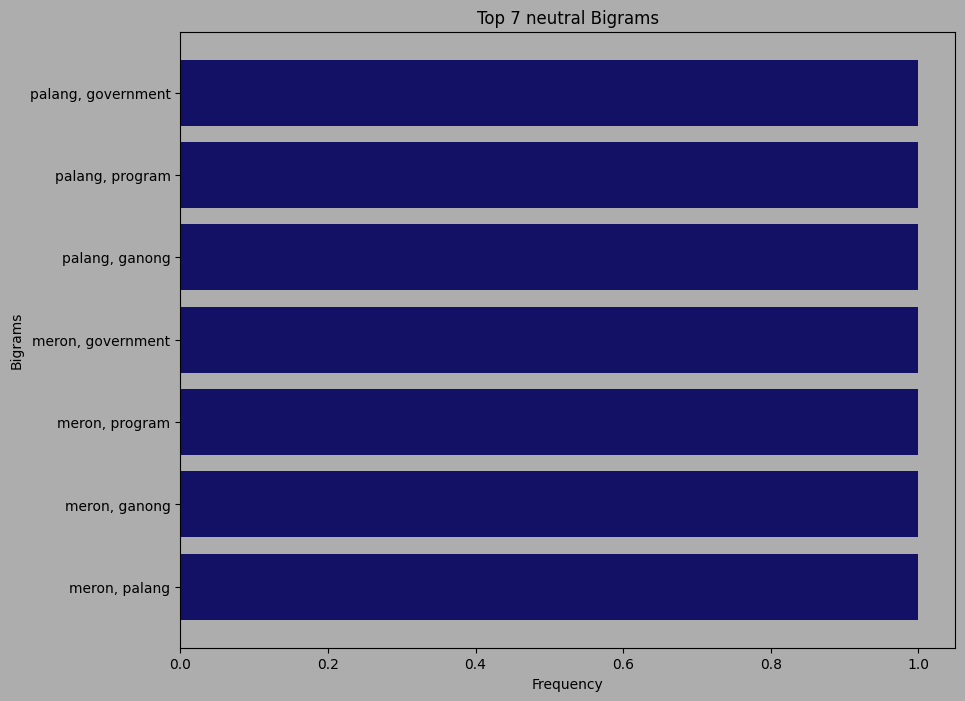

In [115]:
# top 7 nuetral comments _context_base_bam_related
neutral.bigrams(7, 'neutral', 'pozlifewithleo_neutral_context_base_free_tution')